In [75]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
# Machine learning
import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import sklearn
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# set the datatype of loc1 and loc2 to string
df = pd.read_csv('datasets/HaenselAMS/sample.csv', dtype={'loc1': str, 'loc2': str})
df.head(30)

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0000,3.8000,73.4900
1,9,99,1,Thu,340,2760.0000,9.2000,300.0000
2,0,04,0,Mon,16,2700.0000,3.0000,130.0000
3,4,40,1,Mon,17,12320.0000,6.4000,365.0000
4,5,50,1,Thu,610,2117.0000,10.8000,357.5000
5,0,03,1,Tue,483,1899.0000,13.6000,550.0000
6,0,09,1,Mon,214,1000.0000,3.0000,210.0000
7,7,74,1,Wed,452,330.0000,3.0000,366.6700
8,8,89,1,Tue,130,8000.0000,4.5000,193.3300
9,1,17,4,Fri,1004,3135.0000,13.2000,1400.0000


In [3]:
"""
loc1	loc2	para1	dow	para2	para3	para4	price
0	0	01	1	Mon	662	3000.0	3.8	73.49
1	9	99	1	Thu	340	2760.0	9.2	300.00
2	0	04	0	Mon	16	2700.0	3.0	130.00
3	4	40	1	Mon	17	12320.0	6.4	365.00
4	5	50	1	Thu	610	2117.0	10.8	357.50
"""

'\nloc1\tloc2\tpara1\tdow\tpara2\tpara3\tpara4\tprice\n0\t0\t01\t1\tMon\t662\t3000.0\t3.8\t73.49\n1\t9\t99\t1\tThu\t340\t2760.0\t9.2\t300.00\n2\t0\t04\t0\tMon\t16\t2700.0\t3.0\t130.00\n3\t4\t40\t1\tMon\t17\t12320.0\t6.4\t365.00\n4\t5\t50\t1\tThu\t610\t2117.0\t10.8\t357.50\n'

## loc1 and loc2

In [4]:
#Notice that the first character of loc2 is always the same as the character of loc1
df[df['loc1'].str[0] == df['loc2'].str[0]]

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0000,3.8000,73.4900
1,9,99,1,Thu,340,2760.0000,9.2000,300.0000
2,0,04,0,Mon,16,2700.0000,3.0000,130.0000
3,4,40,1,Mon,17,12320.0000,6.4000,365.0000
4,5,50,1,Thu,610,2117.0000,10.8000,357.5000
...,...,...,...,...,...,...,...,...
9995,9,98,3,Fri,386,5000.0000,12.0000,460.0000
9996,7,74,1,Thu,386,3250.0000,8.0000,325.0000
9997,0,06,0,Tue,190,8856.0000,5.6000,133.3300
9998,7,74,3,Fri,717,5000.0000,13.6000,820.0000


In [5]:
# remove the first character of loc2
df['loc2'] = df['loc2'].str[1:]
df.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,1,1,Mon,662,3000.0000,3.8000,73.4900
1,9,9,1,Thu,340,2760.0000,9.2000,300.0000
2,0,4,0,Mon,16,2700.0000,3.0000,130.0000
3,4,0,1,Mon,17,12320.0000,6.4000,365.0000
4,5,0,1,Thu,610,2117.0000,10.8000,357.5000


In [6]:
# get dummy variables for loc1, loc2, and dow, drop_first, and set as int
df = pd.get_dummies(df, columns=['loc1', 'loc2', 'dow'], drop_first=True, dtype=int)
# drop
df.head()

,para1,para2,para3,para4,price,loc1_1,loc1_2,loc1_3,loc1_4,loc1_5,loc1_6,loc1_7,loc1_8,loc1_9,loc1_S,loc1_T,loc2_1,loc2_2,loc2_3,loc2_4,loc2_5,loc2_6,loc2_7,loc2_8,loc2_9,loc2_B,loc2_C,loc2_L,loc2_N,loc2_S,loc2_T,dow_Mon,dow_Sat,dow_Sun,dow_Thu,dow_Tue,dow_Wed
0,1,662,3000.0000,3.8000,73.4900,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,340,2760.0000,9.2000,300.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,16,2700.0000,3.0000,130.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,17,12320.0000,6.4000,365.0000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,610,2117.0000,10.8000,357.5000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
df.describe()

,para1,para2,para3,para4,price,loc1_1,loc1_2,loc1_3,loc1_4,loc1_5,loc1_6,loc1_7,loc1_8,loc1_9,loc1_S,loc1_T,loc2_1,loc2_2,loc2_3,loc2_4,loc2_5,loc2_6,loc2_7,loc2_8,loc2_9,loc2_B,loc2_C,loc2_L,loc2_N,loc2_S,loc2_T,dow_Mon,dow_Sat,dow_Sun,dow_Thu,dow_Tue,dow_Wed
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,1.3808,447.3840,9547.9899,8.4595,433.7331,0.1223,0.1607,0.0945,0.0773,0.0846,0.0620,0.1081,0.0727,0.0690,0.0001,0.0001,0.1317,0.0886,0.0896,0.1098,0.0824,0.1123,0.0902,0.0832,0.1258,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.1918,0.0010,0.0003,0.1908,0.1997,0.2233
std,3.5008,221.0059,8022.8140,4.6135,277.4359,0.3276,0.3673,0.2925,0.2671,0.2783,0.2412,0.3105,0.2597,0.2535,0.0100,0.0100,0.3382,0.2842,0.2856,0.3127,0.2750,0.3158,0.2865,0.2762,0.3316,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.3937,0.0316,0.0173,0.3930,0.3998,0.4165
min,0.0000,16.0000,200.0000,1.0000,50.7300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.0000,301.0000,2898.0000,4.0000,250.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,1.0000,434.0000,6447.0000,7.2000,370.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,582.0000,15000.0000,13.6000,550.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,337.0000,2554.0000,34782.0000,27.2000,5700.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   para1    10000 non-null  int64  
 1   para2    10000 non-null  int64  
 2   para3    10000 non-null  float64
 3   para4    10000 non-null  float64
 4   price    10000 non-null  float64
 5   loc1_1   10000 non-null  int64  
 6   loc1_2   10000 non-null  int64  
 7   loc1_3   10000 non-null  int64  
 8   loc1_4   10000 non-null  int64  
 9   loc1_5   10000 non-null  int64  
 10  loc1_6   10000 non-null  int64  
 11  loc1_7   10000 non-null  int64  
 12  loc1_8   10000 non-null  int64  
 13  loc1_9   10000 non-null  int64  
 14  loc1_S   10000 non-null  int64  
 15  loc1_T   10000 non-null  int64  
 16  loc2_1   10000 non-null  int64  
 17  loc2_2   10000 non-null  int64  
 18  loc2_3   10000 non-null  int64  
 19  loc2_4   10000 non-null  int64  
 20  loc2_5   10000 non-null  int64  
 21  loc2_6   1000

In [9]:
df.describe()
# para1 is highly skewed
# para2 is less skewed, but could benefit from scaling
# para3 is multi-modal with significant variability

,para1,para2,para3,para4,price,loc1_1,loc1_2,loc1_3,loc1_4,loc1_5,loc1_6,loc1_7,loc1_8,loc1_9,loc1_S,loc1_T,loc2_1,loc2_2,loc2_3,loc2_4,loc2_5,loc2_6,loc2_7,loc2_8,loc2_9,loc2_B,loc2_C,loc2_L,loc2_N,loc2_S,loc2_T,dow_Mon,dow_Sat,dow_Sun,dow_Thu,dow_Tue,dow_Wed
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,1.3808,447.3840,9547.9899,8.4595,433.7331,0.1223,0.1607,0.0945,0.0773,0.0846,0.0620,0.1081,0.0727,0.0690,0.0001,0.0001,0.1317,0.0886,0.0896,0.1098,0.0824,0.1123,0.0902,0.0832,0.1258,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.1918,0.0010,0.0003,0.1908,0.1997,0.2233
std,3.5008,221.0059,8022.8140,4.6135,277.4359,0.3276,0.3673,0.2925,0.2671,0.2783,0.2412,0.3105,0.2597,0.2535,0.0100,0.0100,0.3382,0.2842,0.2856,0.3127,0.2750,0.3158,0.2865,0.2762,0.3316,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.3937,0.0316,0.0173,0.3930,0.3998,0.4165
min,0.0000,16.0000,200.0000,1.0000,50.7300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.0000,301.0000,2898.0000,4.0000,250.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,1.0000,434.0000,6447.0000,7.2000,370.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,582.0000,15000.0000,13.6000,550.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,337.0000,2554.0000,34782.0000,27.2000,5700.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


## para1

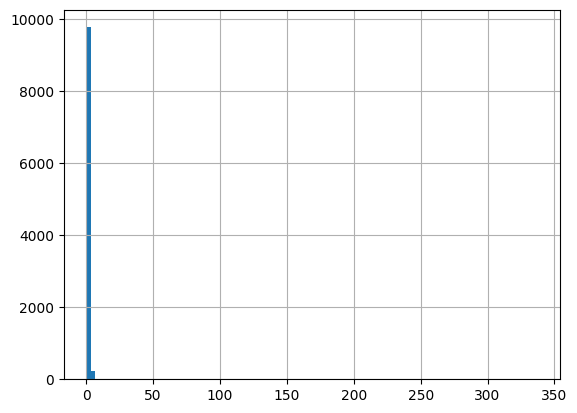

In [10]:
# visualize para1 distribution
df['para1'].hist(bins=100)
plt.show()

In [11]:
df['para1'].value_counts().sort_index()

para1
0       836
1      7052
2       268
3      1613
4       164
5        51
6         6
7         3
8         1
9         2
13        2
24        1
337       1
Name: count, dtype: int64

In [13]:
para1_cat = df['para1'].astype('category')
# 1s and 0s
para1_cat_dummies = pd.get_dummies(para1_cat, drop_first=True, prefix='para1').astype('int')
para1_cat_dummies.head(2)

,para1_1,para1_2,para1_3,para1_4,para1_5,para1_6,para1_7,para1_8,para1_9,para1_13,para1_24,para1_337
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0


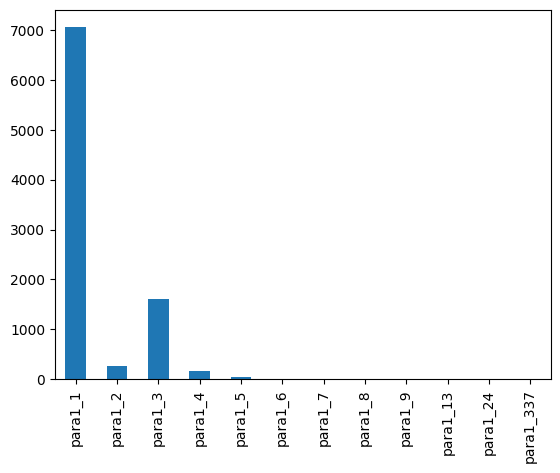

In [14]:
# plot para1_cat_dummies
para1_cat_dummies.sum().plot(kind='bar')
plt.show()

In [15]:
# para1_buckets = pd.cut(df['para1'], bins=75, labels=False)
# print(para1_buckets.value_counts())
# para1_buckets_dummies = pd.get_dummies(para1_buckets, drop_first=True, prefix='para1_bucket').astype('int')
# para1_buckets_dummies.head()

In [16]:
# # plot para1_buckets_dummies
# para1_buckets_dummies.sum().plot(kind='bar')
# plt.show()

In [17]:
# # Define logarithmic bins
# max_value = df['para1'].max()
# bins = np.logspace(0, np.log10(max_value + 1), num=10)  # 10 logarithmic bins
# bins = np.insert(bins, 0, 0)  # Add 0 as the first bucket boundary
# # Apply the buckets
# para1_log_buckets = pd.cut(df['para1'], bins=bins, labels=False)

# # Display the buckets
# print(bins)
# print(para1_log_buckets.value_counts())
# para1_log_buckets_dummies = pd.get_dummies(para1_log_buckets, drop_first=True, prefix='para1_log_bucket').astype('int')
# para1_log_buckets_dummies.head(2)
# # plot para1_log_buckets_dummies
# para1_log_buckets_dummies.sum().plot(kind='bar')
# plt.show()

In [18]:
# # Create quantile-based bins (equal-sized buckets)
# num_buckets = 10
# para1_quantile_buckets = pd.qcut(df['para1'], q=num_buckets, labels=False, duplicates='drop')

# # Display the result
# print(para1_quantile_buckets.value_counts().sort_index())
# # Create dummy variables
# para1_quantile_buckets_dummies = pd.get_dummies(para1_quantile_buckets, drop_first=True, prefix='para1_quantile_bucket').astype('int')
# para1_quantile_buckets_dummies.head(2)
# # plot para1_quantile_buckets_dummies
# para1_quantile_buckets_dummies.sum().plot(kind='bar')
# plt.show()

## para2

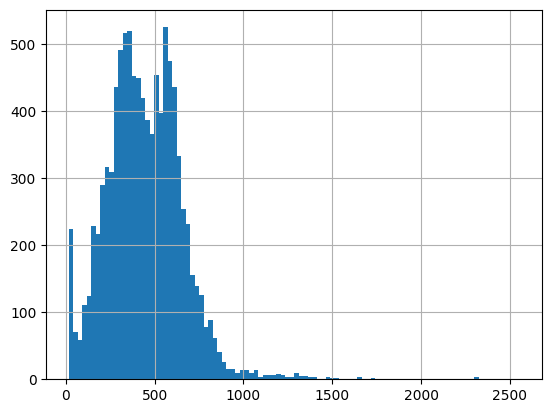

In [19]:
# plot para2 distribution
df['para2'].hist(bins=100)
plt.show()

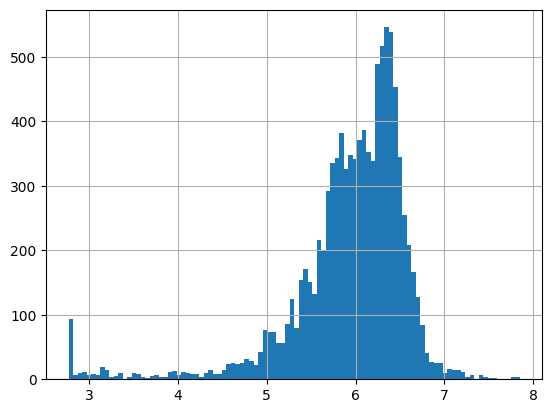

In [20]:
# log base transform para2
para2_log = np.log(df['para2'])
para2_log.hist(bins=100)
# rename para2_log column
para2_log.name = 'para2_log'
plt.show()

In [21]:
# # square root base transform para2
# import numpy as np
# para2_sqrt = np.sqrt(df['para2'])
# para2_sqrt.hist(bins=100)
# plt.show()

In [22]:
# # apply Box-Cox transform to para2. Doesn't work with negative values
# para2_boxcox, _ = boxcox(df['para2'])
# para2_boxcox = pd.Series(para2_boxcox)
# para2_boxcox.hist(bins=100)
# plt.show()

In [23]:
# # apply Yeo-Johnson transform to para2 to accommodate zero values
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer(method='yeo-johnson')
# para2_yeojohnson = pt.fit_transform(df[['para2']])
# para2_yeojohnson = pd.Series(para2_yeojohnson.flatten())
# para2_yeojohnson.hist(bins=100)
# plt.show()

## para3

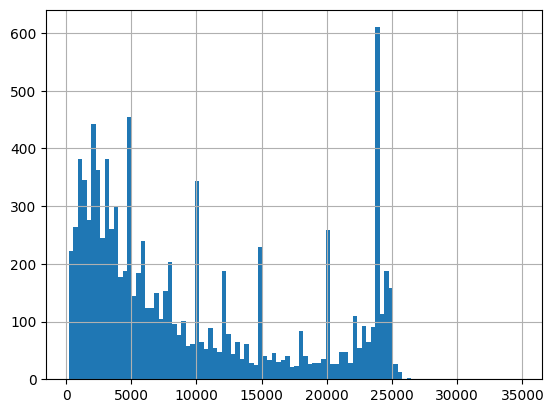

In [24]:
# visualize para3 distribution
df['para3'].hist(bins=100)
plt.show()

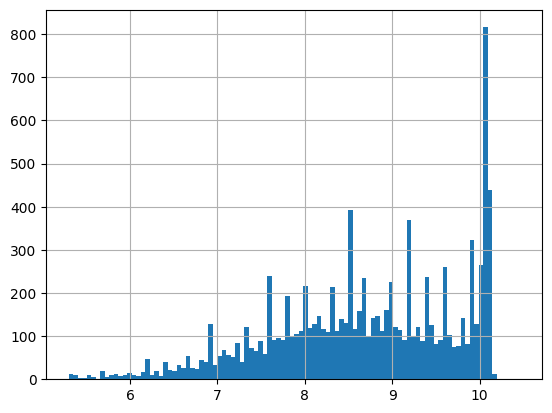

In [25]:
# log transform para3
para3_log = np.log(df['para3'])
para3_log.hist(bins=100)
# rename para3_log column
para3_log.name = 'para3_log'
plt.show()

In [26]:
# # scale para3
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# para3_log_scaled = scaler.fit_transform(para3_log.values.reshape(-1, 1))
# # Convert the result to a Series
# para3_log_scaled = pd.Series(para3_log_scaled.flatten())
# # Plot the result
# para3_log_scaled.hist(bins=100)
# plt.show()

In [27]:
# # apply min-max scaling to para3
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# para3_log_minmax = scaler.fit_transform(df[['para3']])
# # Convert the result to a Series
# para3_log_minmax = pd.Series(para3_log_minmax.flatten())
# # Plot the result
# para3_log_minmax.hist(bins=100)
# plt.show()

In [28]:
# # square root transform para3
# para3_sqrt = np.sqrt(df['para3'])
# para3_sqrt.hist(bins=100)
# plt.show()

In [29]:
# # boxcox transform para3
# para3_boxcox, lambda_val = boxcox(df['para3'])
# para3_boxcox = pd.Series(para3_boxcox)
# para3_boxcox.hist(bins=100)
# plt.title(f'Box-Cox transformed para3 with lambda={lambda_val:.2f}')
# plt.show()

In [30]:
# # Manually create fine-grained bins for high values
# bins = list(range(0, 26000, 500))  # Bins every 500 units up to 26000
# para3_binned = pd.cut(df['para3'], bins=bins, labels=False)

# # Visualize the new binned distribution
# para3_binned.value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
# plt.title("Fine-Grained Bins for para3")
# plt.show()


In [31]:
# import numpy as np
# from scipy.stats.mstats import winsorize

# # Winsorize para3 at the 99th percentile
# para3_winsorized = winsorize(df['para3'], limits=[0, 0.01])

# # Transform after winsorization
# para3_boxcox, lambda_val = boxcox(para3_winsorized)
# plt.hist(para3_boxcox, bins=100)
# plt.title(f"Box-Cox Transformed para3 After Winsorization (lambda={lambda_val:.2f})")
# plt.show()

In [32]:
# # winsorize para3
# from scipy.stats import mstats
# para3_winsorized = mstats.winsorize(df['para3'], limits=[0, 0.01])
# pd.Series(para3_winsorized).hist(bins=100)
# plt.show()

## para4

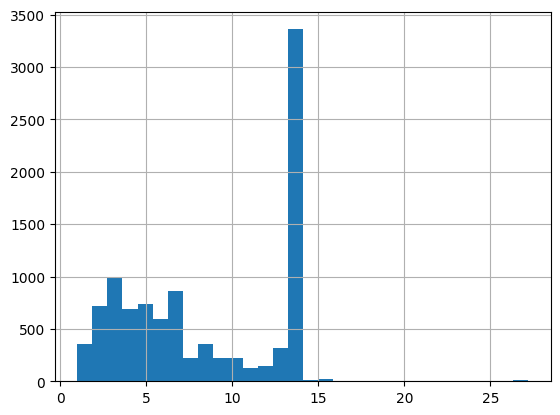

In [33]:
# plot para4 distribution
df['para4'].hist(bins=30)
plt.show()

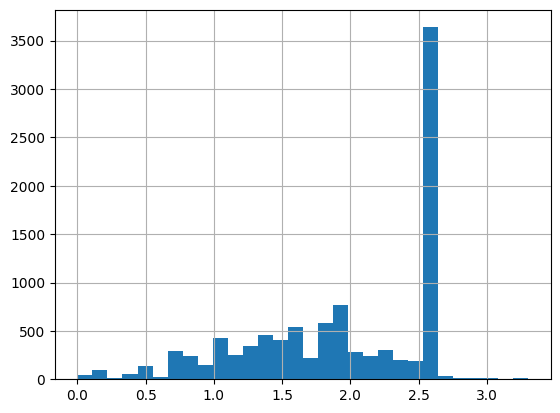

In [34]:
# log transform para4
para4_log = np.log(df['para4'])
para4_log.hist(bins=30)
# rename para4_log column
para4_log.name = 'para4_log'
plt.show()

In [35]:
df = pd.concat([df, para1_cat_dummies, para2_log, para3_log, para4_log], axis=1)
df.head()

,para1,para2,para3,para4,price,loc1_1,loc1_2,loc1_3,loc1_4,loc1_5,loc1_6,loc1_7,loc1_8,loc1_9,loc1_S,loc1_T,loc2_1,loc2_2,loc2_3,loc2_4,loc2_5,loc2_6,loc2_7,loc2_8,loc2_9,loc2_B,loc2_C,loc2_L,loc2_N,loc2_S,loc2_T,dow_Mon,dow_Sat,dow_Sun,dow_Thu,dow_Tue,dow_Wed,para1_1,para1_2,para1_3,para1_4,para1_5,para1_6,para1_7,para1_8,para1_9,para1_13,para1_24,para1_337,para2_log,para3_log,para4_log
0,1,662,3000.0000,3.8000,73.4900,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6.4953,8.0064,1.3350
1,1,340,2760.0000,9.2000,300.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5.8289,7.9230,2.2192
2,0,16,2700.0000,3.0000,130.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.7726,7.9010,1.0986
3,1,17,12320.0000,6.4000,365.0000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.8332,9.4190,1.8563
4,1,610,2117.0000,10.8000,357.5000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6.4135,7.6578,2.3795


In [48]:
df_logs = df.drop(columns=['para1', 'para2', 'para3', 'para4'])
df_no_logs = df.drop(columns=['para1', 'para2_log', 'para3_log', 'para4_log'])

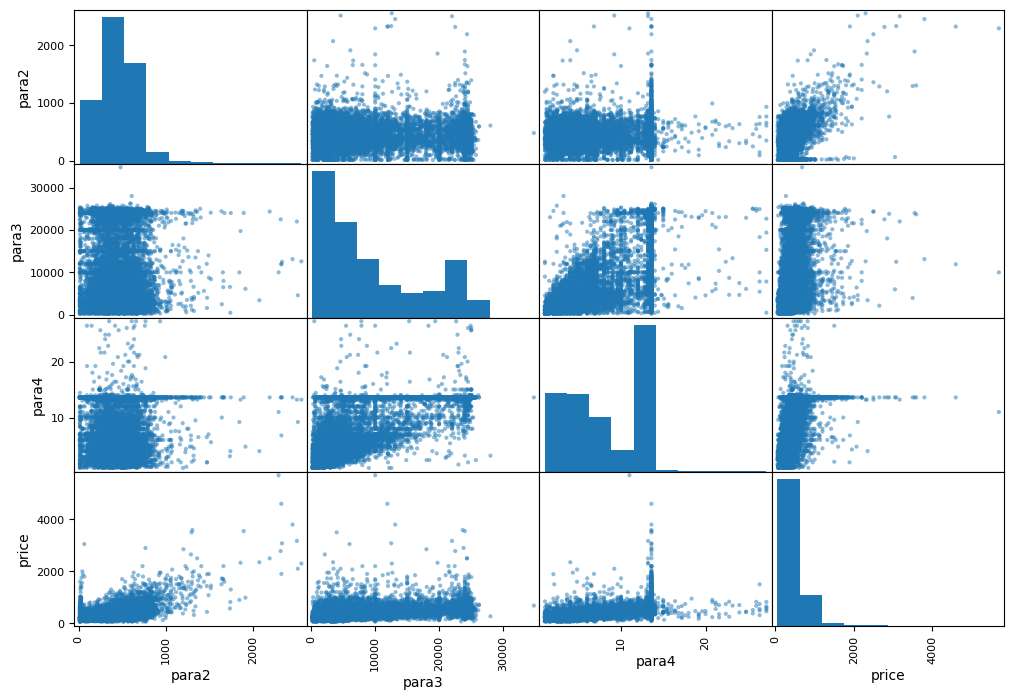

In [53]:
from pandas.plotting import scatter_matrix

# Suppress the output of the scatter_matrix function
_ = scatter_matrix(df_no_logs.iloc[:,0:4], figsize=(12, 8))

In [52]:
pd.DataFrame(abs(df_no_logs.corr()["price"])).sort_values(by = "price", ascending = False)

,price
price,1.0000
para2,0.5527
para4,0.5150
para3,0.3551
para1_2,0.1877
para1_4,0.1449
para1_5,0.1424
para1_1,0.0724
loc1_9,0.0589
loc2_T,0.0525


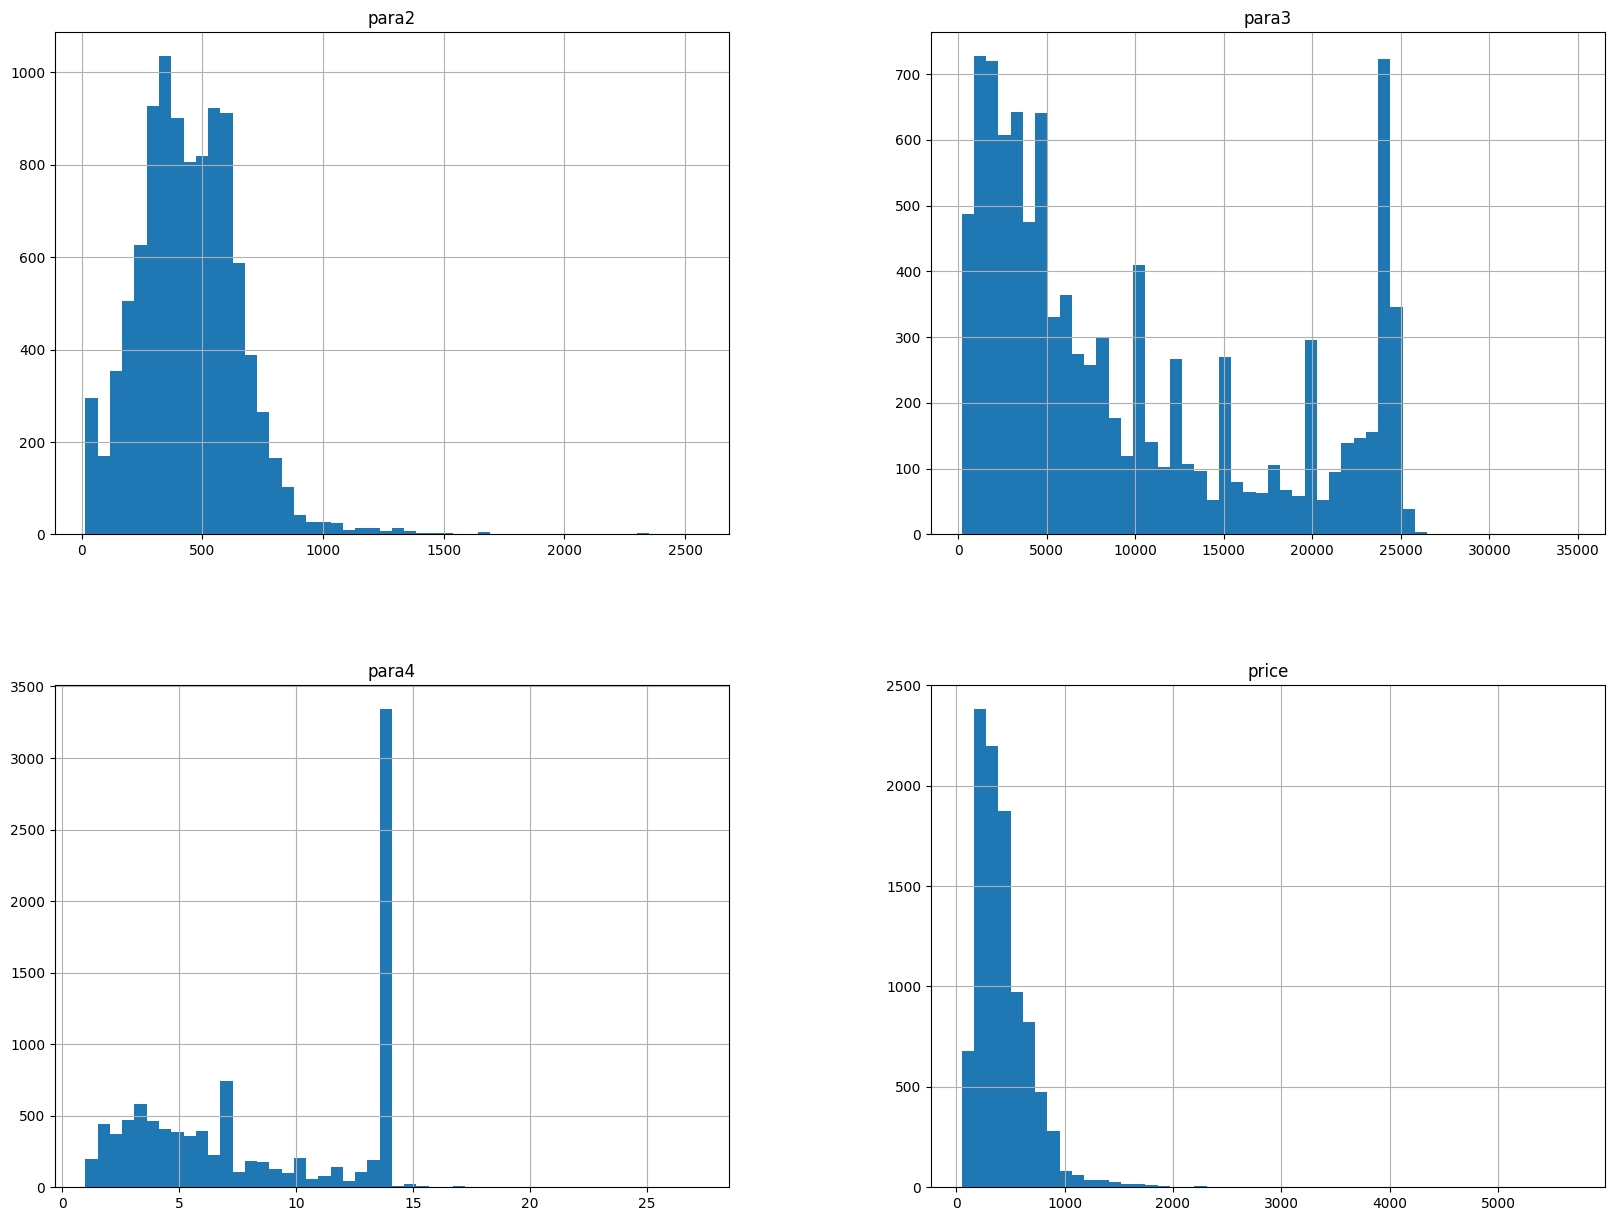

In [55]:
import matplotlib.pyplot as plt 
df_no_logs.iloc[:,0:4].hist(bins=50, figsize=(20,15)) 
plt.show()

In [66]:
n = 10
n_best = []
df_n = pd.DataFrame(df_no_logs.corr()["price"]).sort_values(by = "price", ascending = False)
df_n = df_n.drop(df_n.index[0]).head(n)
for i in range(len(df_n)):
    n_best.append(df_n.index[i]) 
ten_best = n_best
print(ten_best)

['para2', 'para4', 'para3', 'para1_2', 'para1_4', 'para1_5', 'loc2_T', 'loc2_N', 'loc2_B', 'loc1_5']


In [67]:
n = 5
n_best = []
df_n = pd.DataFrame(df_no_logs.corr()["price"]).sort_values(by = "price", ascending = False)
df_n = df_n.drop(df_n.index[0]).head(n)
for i in range(len(df_n)):
    n_best.append(df_n.index[i]) 
five_best = n_best
print(five_best)

['para2', 'para4', 'para3', 'para1_2', 'para1_4']


## Machine Learning - Regression

In [110]:
feature_sets = {
    "full_dataset": df_no_logs.drop(columns=['price']),
    "ten_best": df_no_logs[ten_best],
    "five_best": df_no_logs[five_best]
}

In [111]:
regression_models = {
    "Ridge": linear_model.Ridge(random_state=42),
    "DecisionTree": tree.DecisionTreeRegressor(random_state=42, max_depth=6),
    "RandomForest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LGBM": LGBMRegressor(random_state=42),
    "MLP": MLPRegressor(random_state=42),
}

In [112]:
def make_regression(x_train, y_train, x_eval, y_eval, x_test, y_test, model, model_name, verbose=True):
    model.fit(x_train, y_train)

    # Train metrics
    y_predict_train = model.predict(x_train)
    train_error = root_mean_squared_error(y_train, y_predict_train)
    r2_train = r2_score(y_train, y_predict_train)

    # Evaluation metrics
    y_predict_eval = model.predict(x_eval)
    eval_error = root_mean_squared_error(y_eval, y_predict_eval)
    r2_eval = r2_score(y_eval, y_predict_eval)

    # Test metrics
    y_predict_test = model.predict(x_test)
    test_error = root_mean_squared_error(y_test, y_predict_test)
    r2_test = r2_score(y_test, y_predict_test)

    if verbose:
        print(f"----Model name = {model_name}-----")
        print(f"Train error = {train_error}")
        print(f"Eval error = {eval_error}")
        print(f"Test error = {test_error}")
        print(f"r2_train_score = {r2_train}")
        print(f"r2_eval_score = {r2_eval}")
        print(f"r2_test_score = {r2_test}")
        print("--------------------------------")

    return model, train_error, eval_error, test_error, r2_train, r2_eval, r2_test

In [113]:
pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "Train Error": [],
    "Eval Error": [],
    "Test Error": [],
    "Train R2": [],
    "Eval R2": [],
    "Test R2": [],
}

In [114]:
for feature_set_name, feature_set in feature_sets.items():
    print("------------------------------------------------")
    print(f"Included {feature_set_name}")
    print("------------------------------------------------")
    for model_name, model in regression_models.items():
        y = df_no_logs["price"]
        x = feature_set

        # Split data into train, evaluation, and test sets
        x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)  # 60% train
        x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)  # 20% eval, 20% test

        # Train and evaluate the model
        trained_model, train_error, eval_error, test_error, r2_train, r2_eval, r2_test = make_regression(
            x_train, y_train, x_eval, y_eval, x_test, y_test, model, model_name, verbose=True
        )

        # Store results
        pred_dict["regression_model"].append(model_name)
        pred_dict["feature_set"].append(feature_set_name)
        pred_dict["Train Error"].append(train_error)
        pred_dict["Eval Error"].append(eval_error)
        pred_dict["Test Error"].append(test_error)
        pred_dict["Train R2"].append(r2_train)
        pred_dict["Eval R2"].append(r2_eval)
        pred_dict["Test R2"].append(r2_test)

------------------------------------------------
Included full_dataset
------------------------------------------------
----Model name = Ridge-----
Train error = 165.7562085490617
Eval error = 197.27471517239593
Test error = 199.17694388331196
r2_train_score = 0.6082206452093647
r2_eval_score = 0.5415090941830789
r2_test_score = 0.5567621049512688
--------------------------------
----Model name = DecisionTree-----
Train error = 139.67323960437767
Eval error = 196.90926433146714
Test error = 185.53179176309766
r2_train_score = 0.7218184319320027
r2_eval_score = 0.5432062269204793
r2_test_score = 0.6154122627120295
--------------------------------
----Model name = RandomForest-----
Train error = 56.18753794577296
Eval error = 178.83093793530975
Test error = 170.64572815997772
r2_train_score = 0.9549824409538917
r2_eval_score = 0.6232327159643336
r2_test_score = 0.6746509097157374
--------------------------------
----Model name = XGBoost-----
Train error = 72.09889891042398
Eval error = 1

In [124]:
pred_dict['feature_set']

['full_dataset',
 'full_dataset',
 'full_dataset',
 'full_dataset',
 'full_dataset',
 'full_dataset',
 'ten_best',
 'ten_best',
 'ten_best',
 'ten_best',
 'ten_best',
 'ten_best',
 'five_best',
 'five_best',
 'five_best',
 'five_best',
 'five_best',
 'five_best']

In [132]:
pred_df = pd.DataFrame(pred_dict)
# highlight the maximum in a column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# highlight the minimum in a column
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

# highlight the minimum of 'Train Error', 'Eval Error', 'Test Error' and the maximum of 'Train R2', 'Eval R2', 'Test R2'
pred_df.style.apply(highlight_min, subset=['Train Error', 'Eval Error', 'Test Error']).apply(highlight_max, subset=['Train R2', 'Eval R2', 'Test R2'])

,regression_model,feature_set,Train Error,Eval Error,Test Error,Train R2,Eval R2,Test R2
0,Ridge,full_dataset,165.756209,197.274715,199.176944,0.608221,0.541509,0.556762
1,DecisionTree,full_dataset,139.673240,196.909264,185.531792,0.721818,0.543206,0.615412
2,RandomForest,full_dataset,56.187538,178.830938,170.645728,0.954982,0.623233,0.674651
3,XGBoost,full_dataset,72.098899,186.726699,173.588665,0.925876,0.589228,0.663332
4,LGBM,full_dataset,115.124490,179.715612,172.159887,0.811011,0.619496,0.668852
5,MLP,full_dataset,175.891360,202.185162,208.600014,0.558845,0.518400,0.513831
6,Ridge,ten_best,166.974893,198.280781,199.858164,0.602439,0.536821,0.553725
7,DecisionTree,ten_best,140.209472,192.002469,181.266308,0.719678,0.565688,0.632893
8,RandomForest,ten_best,60.764119,187.265207,172.655775,0.947350,0.586855,0.666941
9,XGBoost,ten_best,87.715799,196.213229,177.860460,0.890287,0.546430,0.646558


In [133]:
# Add a column for a simplified feature set name
pred_df["feature_set_2"] = pred_df["feature_set"].apply(lambda x: x.split('_')[0])
# Combine model name and feature set for unique identification
pred_df["Model_with_Data_set"] = pred_df['regression_model'] + "_" + pred_df["feature_set_2"]

In [134]:
# Prepare the dataframe for plotting
df_barh = pred_df[["Train Error", "Eval Error", "Test Error", "Train R2", "Eval R2", "Test R2", "Model_with_Data_set"]]
df_train_error = df_barh[['Model_with_Data_set', 'Train Error']]
df_eval_error = df_barh[['Model_with_Data_set', 'Eval Error']]
df_test_error = df_barh[['Model_with_Data_set', 'Test Error']]

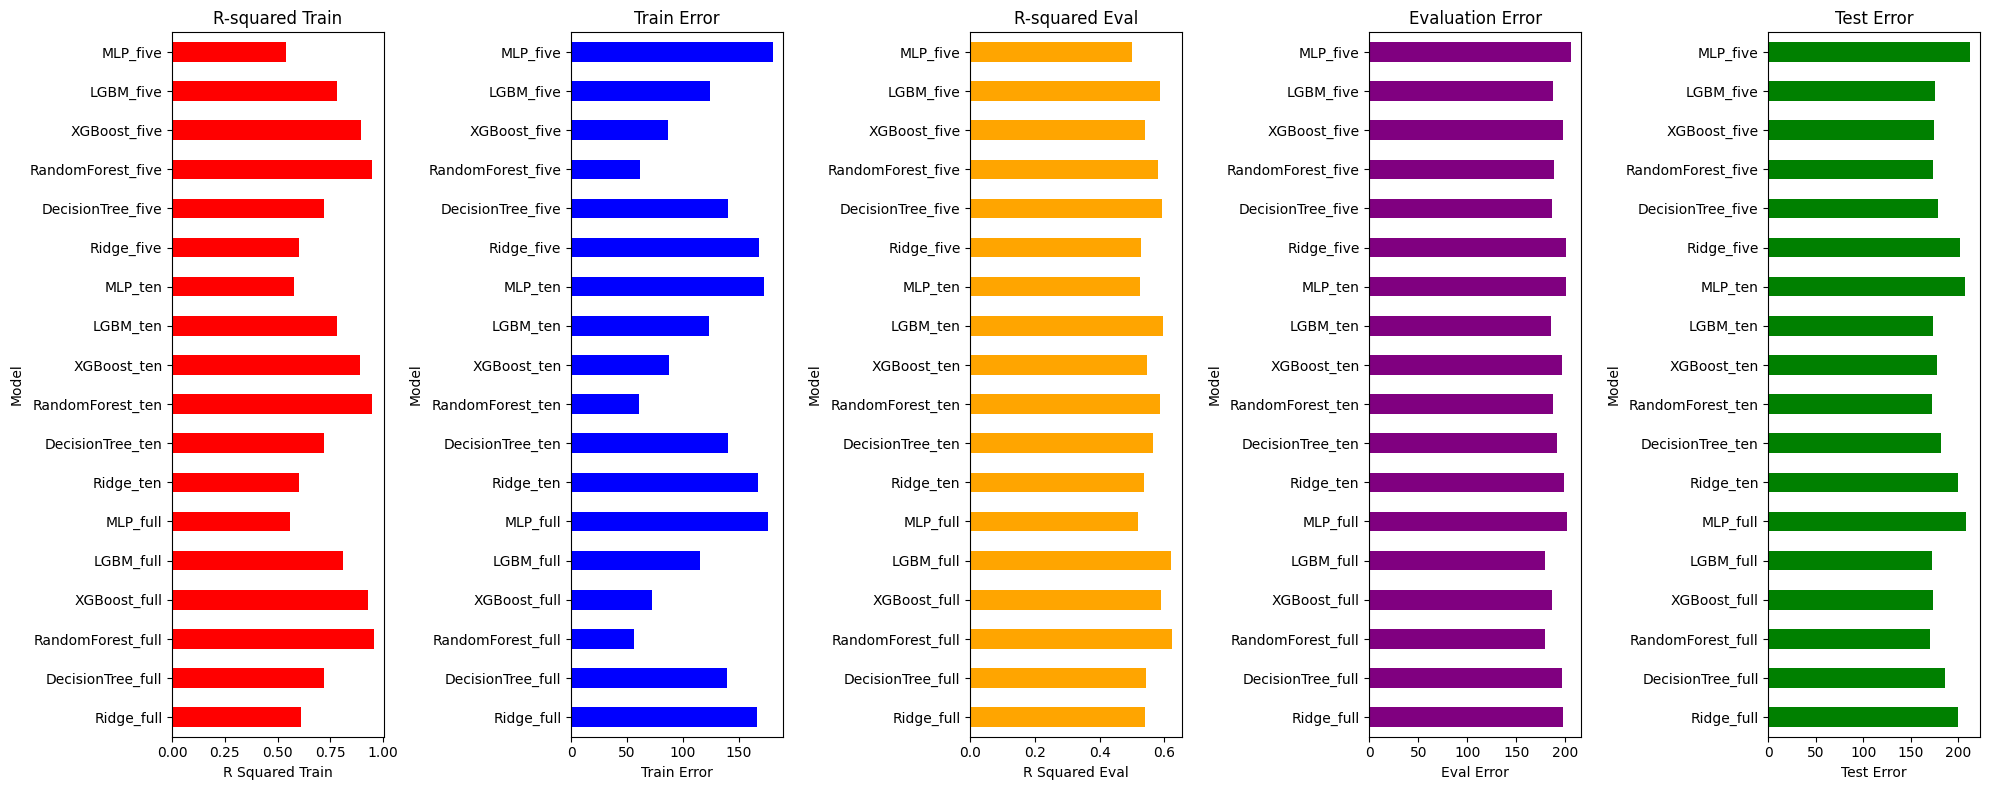

In [135]:
# Create a figure and subplots
fig, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 5, figsize=(20, 8))

# Create the R-squared Train plot
df_barh.plot(kind='barh', x='Model_with_Data_set', y='Train R2', color='red', ax=ax2, legend=False)
ax2.set_xlabel('R Squared Train')
ax2.set_ylabel('Model')
ax2.set_title('R-squared Train')

# Create the Train Error plot
df_train_error.plot(kind='barh', x='Model_with_Data_set', y='Train Error', color='blue', ax=ax3, legend=False)
ax3.set_xlabel('Train Error')
ax3.set_ylabel('Model')
ax3.set_title('Train Error')

# Create the R-squared Evaluation plot
df_barh.plot(kind='barh', x='Model_with_Data_set', y='Eval R2', color='orange', ax=ax4, legend=False)
ax4.set_xlabel('R Squared Eval')
ax4.set_ylabel('Model')
ax4.set_title('R-squared Eval')

# Create the Evaluation Error plot
df_eval_error.plot(kind='barh', x='Model_with_Data_set', y='Eval Error', color='purple', ax=ax5, legend=False)
ax5.set_xlabel('Eval Error')
ax5.set_ylabel('Model')
ax5.set_title('Evaluation Error')

# Create the Test Error plot
df_test_error.plot(kind='barh', x='Model_with_Data_set', y='Test Error', color='green', ax=ax6, legend=False)
ax6.set_xlabel('Test Error')
ax6.set_ylabel('Model')
ax6.set_title('Test Error')

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Separate features and target
x = df_no_logs.drop(columns=['price'])
y = df_no_logs["price"]

# Split data into train, evaluation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)  # 60% train
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)  # 20% eval, 20% test

# Define the model
model = RandomForestRegressor(random_state=42)
model_name = "Random Forest"

# Fit the model
model.fit(x_train, y_train)

# Train metrics
y_train_pred = model.predict(x_train)
train_error_f = root_mean_squared_error(y_train, y_train_pred)
r2_train_f = r2_score(y_train, y_train_pred)

# Evaluation metrics
y_eval_pred = model.predict(x_eval)
eval_error_f = root_mean_squared_error(y_eval, y_eval_pred)
r2_eval_f = r2_score(y_eval, y_eval_pred)

# Test metrics
y_test_pred = model.predict(x_test)
test_error_f = mean_squared_error(y_test, y_test_pred)
r2_test_f = r2_score(y_test, y_test_pred)

# Print metrics
print(f"----Model name = {model_name}-----")
print(f"Train error = {train_error_f}")
print(f"Eval error = {eval_error_f}")
print(f"Test error = {test_error_f}")
print(f"R2 score (Train) = {r2_train_f}")
print(f"R2 score (Eval) = {r2_eval_f}")
print(f"R2 score (Test) = {r2_test_f}")
print("--------------------------------")

----Model name = Random Forest-----
Train error = 56.18753794577296
Eval error = 178.83093793530975
Test error = 29119.96453924901
R2 score (Train) = 0.9549824409538917
R2 score (Eval) = 0.6232327159643336
R2 score (Test) = 0.6746509097157374
--------------------------------


In [138]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [141]:
print(sklearn.metrics.get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'r

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    
    'bootstrap': [True],
    'ccp_alpha' : [0.0],
    'criterion': ['squared_error'],
    'max_depth': [None],    
    'max_features': ['auto'],
    'max_leaf_nodes' : [None],
    'max_samples' : [None],
    'min_impurity_decrease' : [0.0],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'min_weight_fraction_leaf' : [0.0],
    'n_estimators': [50, 500, 700,],
    'n_jobs' : [None],
    'oob_score' :[True, False],
    'random_state' : [42],
    'verbose' : [0],
    'warm_start' : [True, False],
    
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0, scoring = 'neg_mean_squared_error')

In [ ]:
import time
start = time.time()
grid_search.fit(x_train, y_train)

end = time.time()
elapsed_time_seconds = end - start
elapsed_time = (elapsed_time_seconds) / 60
elapsed_time_seconds = round(elapsed_time_seconds,2)
elapsed_time = round(elapsed_time,2)
print('Execution time:', elapsed_time_seconds, 'seconds which is:', elapsed_time, 'minutes.' )

In [ ]:
x = df_no_logs.drop(columns=['price'])
y = df_no_logs["price"]
x_train, x_test, y_train, y_test = train_test_split(
x, y, 
test_size=0.2, random_state=42
)

model = RandomForestRegressor()

model.set_params(**best_params)

model_name = "Random Forest"

model.fit(x_train,y_train)

y_predict= model.predict(x_train)
train_error_gr = mean_squared_error(y_train, y_predict, squared=False)

y_predict =model.predict(x_test)
test_error_gr = mean_squared_error(y_test, y_predict, squared=False)

y_predict=model.predict(x_train)
r2_gr = r2_score(y_train, y_predict)


print("----Model name = {}-----".format(model_name))
print("Train error = "'{}'.format(train_error_gr))
print("Test error = "'{}'.format(test_error_gr))
print("r2_score = "'{}'.format(r2_gr))
print("--------------------------------")